In [1]:
from models import *
from static import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Simulate One Model

In [2]:
steps = 100
model = abmodel(static_map_v0(), all_agents())
model.run_model(steps)
model_results = model.datacollector.get_model_vars_dataframe()
model_results.head(10)

,Step,(Corporate V0),Trade Volume (Corporate V0),Price (Corporate V0),(Central Bank V0),interest_rate,inflation_rate,growth_rate,target_interest_rate,target_inflation_rate,...,Trade Volume (Local Bank),Price (Local Bank),Hedge Volume (Local Bank),Hedge Price (Local Bank),(Arbitrager),Trade Volume (Arbitrager),Price (Arbitrager),(Speculator),Trade Volume (Speculator),Price (Speculator)
0,1,200,32,0.663523,2,"(0.0025, -0.0025)","(0.0436943055504163, 0.007781741655361227)","(0.028834926309501595, 0.016437822497256897)","(0.01625, 0.0035000000000000005)","(0.02, 0.015)",...,32,0.663523,172,1.090643,4,427,0.842092,3,0,NaN
1,2,200,22,0.673880,2,"(0.0025, -0.0025)","(0.03317523283000731, 0.003674027449306049)","(0.02683410920272939, 0.01870179027367177)","(0.05495892148037525, -0.01)","(0.02, 0.015)",...,22,0.673880,162,0.903226,4,176,0.714396,3,0,NaN
2,3,200,28,0.730221,2,"(0.0025, -0.0025)","(0.02472845333931335, 0.00830922036005842)","(0.03430797570785212, 0.014165948145840757)","(0.038179903846375665, -0.01)","(0.02, 0.015)",...,28,0.730221,31,0.688390,4,4,0.632367,3,0,NaN
3,4,200,2,0.320000,2,"(0.0025, -0.0025)","(0.022403822507841186, 0.007079122156019151)","(0.03358699440598825, 0.008140548940312367)","(0.029246667862896085, -0.01)","(0.02, 0.015)",...,2,0.320000,2,0.611882,4,54,0.523546,3,0,NaN
4,5,200,2,0.339853,2,"(0.0025, -0.0025)","(0.019788933398759527, 0.007475315337287423)","(0.029363601877230902, 0.009087582478079358)","(0.025399230964755905, -0.01)","(0.02, 0.015)",...,2,0.339853,12,0.639826,4,14,0.506765,3,0,NaN
5,6,200,0,NaN,2,"(0.0025, -0.0025)","(0.028953320217705275, 0.005332602015710831)","(0.040528432517394734, 0.015881312917100127)","(0.019365201036754744, -0.01)","(0.02, 0.015)",...,0,NaN,7,0.600000,4,0,NaN,3,0,NaN
6,7,200,0,NaN,2,"(0.0025, -0.0025)","(0.03171126026034196, 0.0017802649967018627)","(0.034276823501525173, 0.015526323546457284)","(0.038694196585255275, -0.01)","(0.02, 0.015)",...,0,NaN,1,0.500000,4,0,NaN,3,0,NaN
7,8,200,2,0.414246,2,"(0.0025, -0.0025)","(0.025940385232623653, 0.004097192158758887)","(0.033549036676246376, 0.009432988822675016)","(0.03970530214127553, -0.01)","(0.02, 0.015)",...,2,0.414246,1,0.500000,4,0,NaN,3,0,NaN
8,9,200,1,0.330000,2,"(0.0025, -0.0025)","(0.03129961045920701, 0.003917033980617341)","(0.031018240887067727, 0.010781985708794461)","(0.030685096187058666, -0.01)","(0.02, 0.015)",...,1,0.330000,3,0.547655,4,0,NaN,3,0,NaN
9,10,200,0,NaN,2,"(0.0025, -0.0025)","(0.03210268571164681, 0.007268934720944895)","(0.0365489924054823, 0.01804156705243524)","(0.03745853613234438, -0.01)","(0.02, 0.015)",...,1,0.490000,3,0.544543,4,0,NaN,3,1,0.49


### Corporate Details

In [3]:
model.corporate_details.by_agent(model.corporate_details.all_ids()[0]).head(10)

,Step,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,0,"(8, 47)",485.0000,341.0000,"(None, None, None)",[],[],[],826.000000
1,1,"(10, 50)",491.9975,336.0125,"(short, 0.37, 396)",[],[],[],928.377370
2,2,"(8, 47)",492.9950,331.0250,"(short, 0.37, 398)",[],[],[],1018.431508
3,3,"(9, 46)",493.9925,326.0375,"(short, 0.36, 400)",[],[],[],1015.652500
4,4,"(7, 43)",493.9900,321.0500,"(short, 0.36, 401)",[],[],[],1077.717273
5,5,"(6, 39)",493.9875,316.0625,"(short, 0.35, 402)",[],[],[],1126.112500
6,6,"(4, 40)",493.9850,311.0750,"(short, 0.35, 403)",[],[],[],1116.135000
7,7,"(4, 40)",492.9825,306.0875,"(short, 0.35, 404)",[],[],[],1105.157500
8,8,"(4, 40)",491.9800,301.1000,"(short, 0.34, 404)",[],[],[],1106.469796
9,9,"(4, 40)",490.9775,296.1125,"(short, 0.34, 404)",[],[],[],1095.288724


In [4]:
model.corporate_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,4642,"(12, 15)",91.1725,183.1600,"(None, None, None)",[],[],[],180.737292
1,4648,"(10, 66)",51.1725,154.7500,"(None, None, None)",[],[],[],126.844872
2,4650,"(6, 21)",103.3450,152.7500,"(None, None, None)",[],[],[],178.039377
3,4651,"(8, 7)",7.1725,32.8800,"(None, None, None)",[],[],[],23.250740
4,4653,"(7, 23)",3.1725,11.3500,"(long, 0.09, 1)",[],[],[],8.722622
...,...,...,...,...,...,...,...,...,...
193,5030,"(17, 63)",46.7375,72.0250,"(long, 0.84, 27)",[],[],[],81.957549
194,5031,"(13, 71)",242.7375,379.0125,"(long, 1.81, 139)",[],[],[],428.073686
195,5032,"(9, 71)",56.7375,85.0125,"(long, 1.87, 30)",[],[],[],98.308405
196,5033,"(14, 67)",312.6500,385.0250,"(long, 1.25, 131)",[],[],[],500.926284


### Bank Details

In [5]:
model.bank_details.all_ids()

[4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849]

In [6]:
model.bank_details.by_agent(model.bank_details.all_ids()[0]).tail(10)

,Step,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with,Arbed Price,Arbed Amount,Arbed with,Firm Value
56,56,"(13, 3)",95.935,15.1800,[],[],[],[],[],[],"[0.36, 0.37]","[-1, -1]","[4851, 4851]",135.363571
57,57,"(13, 3)",85.875,13.5775,[],[],[],[],[],[],"[0.33, 0.34, 0.35, 0.37]","[-1, -1, -1, -1]","[4850, 4850, 4850, 4850]",120.689103
58,58,"(13, 3)",69.815,15.8450,[1.35],[-1],[4694],[],[],[],"[0.37, 0.38, 0.4, 0.41, 0.43, 0.45, 0.47, 0.49...","[-1, -1, -1, -1, -1, -1, -1, -1, -1]","[4851, 4851, 4851, 4851, 4851, 4851, 4851, 485...",99.711226
59,59,"(13, 3)",62.755,13.4425,[0.59],[-1],[4814],[],[],[],[],[],[],88.605962
60,60,"(13, 3)",54.695,11.3800,[],[],[],[],[],[],"[0.45, 0.48]","[-1, -1]","[4851, 4851]",77.455000
61,61,"(13, 3)",45.635,9.7375,[],[],[],[],[],[],"[0.42, 0.45, 0.48]","[-1, -1, -1]","[4850, 4850, 4850]",64.360962
62,62,"(13, 3)",37.575,7.6150,[],[],[],[],[],[],"[0.42, 0.45]","[-1, -1]","[4850, 4850]",53.115816
63,63,"(13, 3)",28.515,5.8225,[],[],[],[],[],[],"[0.36, 0.4, 0.44]","[-1, -1, -1]","[4851, 4851, 4851]",40.520155
64,64,"(13, 3)",19.455,3.9100,[],[],[],[],[],[],"[0.31, 0.36, 0.41]","[-1, -1, -1]","[4851, 4851, 4851]",27.600833
65,65,"(13, 3)",9.395,1.9475,[],[],[],[],[],[],"[0.17, 0.22, 0.28, 0.36]","[-1, -1, -1, -1]","[4851, 4851, 4851, 4851]",13.329343


In [7]:
model.bank_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with,Arbed Price,Arbed Amount,Arbed with,Firm Value
0,4844,"(10, 51)",15414.3650,13743.87,[2.25],[-29],[5020],[],[],[],[],[],[],22135.083826
1,4848,"(15, 67)",65.7625,193.20,[],[],[],[],[],[],[],[],[],160.236828


### Interbank Limit Order Book

In [8]:
model.bank_details.lob_plot(steps)

In [9]:
model.bank_details.top_of_book_plot()

In [10]:
model.bank_details.price_plot()

### Arbitrager Details

In [11]:
model.arbitrager_details.all_ids()

[4850, 4851, 4852, 4853]

In [12]:
model.arbitrager_details.by_agent(model.arbitrager_details.all_ids()[0]).tail()

,Step,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Firm Value
96,96,"(24, 15)",100,179.42,[],[],[],187.309002
97,97,"(24, 15)",100,179.42,[],[],[],187.097087
98,98,"(24, 15)",100,179.42,[],[],[],191.307888
99,99,"(24, 15)",100,179.42,[],[],[],189.710000
100,100,"(24, 15)",100,179.42,[],[],[],187.735941


In [13]:
model.arbitrager_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Firm Value
0,4850,"(24, 15)",100,179.42,[],[],[],187.735941
1,4851,"(24, 35)",100,127.88,[],[],[],162.533007
2,4852,"(24, 50)",100,127.16,[],[],[],162.180929
3,4853,"(24, 75)",100,209.38,[],[],[],202.386308


### Speculator Details

In [14]:
model.speculator_details.all_ids()

[4856, 4854, 4855]

In [15]:
model.speculator_details.by_agent(model.speculator_details.all_ids()[0])[25:75]

,Step,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
25,25,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],333.459016
26,26,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],342.016949
27,27,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],366.185185
28,28,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],371.566038
29,29,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],382.960784
30,30,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],395.285714
31,31,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],401.833333
32,32,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],415.782609
33,33,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],342.016949
34,34,"(14, 46)",81.000000,77.000000,"(None, None, None)",[],[],[],297.901408


In [16]:
model.speculator_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,4854,"(15, 46)",79.000000,17.560000,"(None, None, None)",[],[],[],87.586797
1,4855,"(15, 70)",7.000000,128.790000,"(None, None, None)",[],[],[],69.977995
2,4856,"(14, 46)",316.153988,-146.138571,"(None, None, None)",[],[],[],244.692584


### Central Bank Detail

In [17]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def plot_central_bank(model_results):

    steps_data = model_results['Step'].values
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)
    inflation_rate_1_data, inflation_rate_2_data = zip(*model_results['inflation_rate'].values)

    growth_rate_1_data, growth_rate_2_data = zip(*model_results['growth_rate'].values)
    target_interest_rate_1_data, target_interest_rate_2_data = zip(*model_results['target_interest_rate'].values)
    target_inflation_rate_1_data, target_inflation_rate_2_data = zip(*model_results['target_inflation_rate'].values)


    fig = make_subplots(rows = 2, cols = 2, subplot_titles=['Central Bank 1', 'Central Bank 2'])
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    inflation_rate_1 = go.Scatter(x = steps_data, y = inflation_rate_1_data, name = 'Inflation Rate(1)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_1 = go.Scatter(x = steps_data, y = growth_rate_1_data, name = 'Growth Rate(1)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green'))
    # target_interest_rate_1 = go.Scatter(x = steps_data, y = target_interest_rate_1_data, name = 'target interest rate (1)',  line = dict(color = 'red'))

    inflation_rate_2 = go.Scatter(x = steps_data, y = inflation_rate_2_data, name = 'Inflation Rate(2)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_2 = go.Scatter(x = steps_data, y = growth_rate_2_data, name = 'Growth Rate(2)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'green'))
    # target_interest_rate_2 = go.Scatter(x = steps_data, y = target_interest_rate_2_data, name = 'target interest rate (2)',  line = dict(color = 'red'))


    fig.add_trace(inflation_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 2, col = 1)
    fig.add_trace(growth_rate_1, row = 2, col = 1)
    # fig.add_trace(target_interest_rate_1, row = 1, col = 1)

    fig.add_trace(inflation_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 2, col = 2)
    fig.add_trace(growth_rate_2, row = 2, col = 2)
    # fig.add_trace(target_interest_rate_2, row = 1, col = 2)

    fig.update_layout(title_text = 'Central Bank Agent Behavior and Macroeconomics', showlegend=True)

    fig.update_layout(template = temp,
                      hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 100, b = 40),
                      height = 800, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


plot_central_bank(model_results)

### Agent-Based Map of Resources

In [18]:
import plotly.express as px
import plotly.graph_objs as go

def plot_map(model):

    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b

    fig = px.imshow(world_map, color_continuous_scale='dense')
    temp = dict(layout = go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    fig.update_layout(template = temp,
                    title_text = 'Overall Map Layout - Mimic US and Japan',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 100, b = 20),
                    height = 500, 
                    width = 800, 
                    showlegend = True, 
                    legend = dict(yanchor = "top", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_map(model)

### Visualize How Agents Move 

In [19]:
def built_agent_position_df(model):

    agent_position_df = pd.DataFrame()

    for i in range(steps):

        # corporations
        pos_corps = pd.DataFrame(model.corporate_details.agent_pos[i], index = model.corporate_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_corps['steps'] = i
        pos_corps['agent_type'] = 'corps'

        # banks 
        pos_banks = pd.DataFrame(model.bank_details.agent_pos[i], index = model.bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_banks['steps'] = i
        pos_banks['agent_type'] = 'banks'

        # international banks
        #pos_international_banks = pd.DataFrame(model.international_bank_details.agent_pos[i], index = model.international_bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        #pos_international_banks['steps'] = i
        #pos_international_banks['agent_type'] = 'international_banks'


        # aggregate position df
        #frames = [pos_corps, pos_banks, pos_international_banks]
        frames = [pos_corps, pos_banks]
        all_position = pd.concat(frames)
        
        if i == 0:
            agent_position_df  = all_position
        
        else:
            frames = [agent_position_df, all_position]
            agent_position_df = pd.concat(frames)


    return agent_position_df


agent_position_df = built_agent_position_df(model)
agent_position_df

,agent_id,y,x,steps,agent_type
0,4640,8,47,0,corps
1,4641,2,1,0,corps
2,4642,15,25,0,corps
3,4643,18,17,0,corps
4,4644,13,18,0,corps
...,...,...,...,...,...
199,5033,14,72,99,corps
200,5034,16,68,99,corps
0,4844,10,51,99,banks
1,4845,23,44,99,banks


In [20]:

def plot_agent_movement(model, agent_position_df):

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b


    fig = px.scatter(agent_position_df, 
                    x = "x", 
                    y = "y", 
                    animation_frame = "steps", 
                    animation_group = "agent_id", 
                    color = "agent_type", 
                    color_discrete_sequence = ["black", "red", "green"],
                    hover_name = "agent_type")

    fig.add_heatmap(z = world_map, 
                    colorscale='dense', 
                    colorbar=dict(title='Level of Resources'))

    fig.update_yaxes(range = [agent_position_df['y'].max() + 5, agent_position_df['y'].min() - 5])

    fig.update_layout(template = temp,
                    title_text = 'Final Position of the Agents on The Map',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 500, 
                    width = 1000, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))
    return fig


plot_agent_movement(model, agent_position_df)

### Number of Agent during Simulation

In [21]:
def plot_agent_population(agent_position_df):

    number_of_agents_df = agent_position_df.groupby(['steps', 'agent_type'])['agent_id'].count().reset_index(name = 'Number of Agents')
    number_of_agents_corps = number_of_agents_df[number_of_agents_df['agent_type'] == 'corps']


    fig = make_subplots(rows=1, cols=1)
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    corps = go.Scatter(y = number_of_agents_corps['Number of Agents'], name = 'Population')

    # fig.add_trace(banks)
    fig.add_trace(corps)

    fig.update_layout(template = temp,
                    title_text = 'Number of Corporation Agent',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 300, 
                    width = 600, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_agent_population(agent_position_df)

In [22]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def corporate_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)


    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Scatter(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', line = dict(color = 'green'))
    interest_rate_2 = go.Scatter(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', line = dict(color = 'grey'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))

    fig.add_trace(corporate_value_line, row = 1, col =1, secondary_y='True')
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Corporate Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 



corporate_value_and_interest_rate_plot(model, model_results, steps)

In [23]:
def bank_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    bank_value = [model.bank_details.by_step(i)['Firm Value'].mean() / 10 for i in range(steps)]
    traded_volume = model_results['(Corporate V0)'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green', opacity = 0.6))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'grey',  opacity = 0.6))
    bank_value_line = go.Scatter(x = steps_data, y = bank_value, name = 'bank value', line = dict(color = 'red'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))
    # traded_volume_line = go.Scatter(x = steps_data, y = traded_volume, name = 'traded volume', line = dict(color = 'orange'))

    fig.add_trace(bank_value_line, row = 1, col = 1, secondary_y='True')
    fig.add_trace(corporate_value_line, row = 1, col = 1)
    # fig.add_trace(traded_volume_line, row = 1, col= 1)
    # fig.add_trace(interest_rate_1, row = 1, col = 1)
    # fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Bank Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 1, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


bank_value_and_interest_rate_plot(model, model_results, steps)

### playground - Stylized Facts

In [24]:
import datetime as dt
import yfinance as yf 
from fredapi import Fred 
import statsmodels.api as sm
from scipy.stats import norm

In [25]:
best_bid = []
best_ask = []
mid_price = []


for i in range(steps):

    interbank_bid, interbank_ask = model.bank_details.lob(step = i)

    try:
        best_bid_price = np.sort(list(interbank_bid.keys()))[-1]
    except:
        best_bid_price = np.NaN
    
    try:
        best_ask_price = np.sort(list(interbank_ask.keys()))[0]
    except:
        best_ask_price = np.NaN

    best_bid.append(best_bid_price)
    best_ask.append(best_ask_price)
    mid_price.append((best_bid_price + best_ask_price)/2)



interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

price_df = pd.DataFrame()
price_df['time_steps'] = np.arange(1, steps +1)
price_df['Ask(1)'] = best_ask
price_df['Bid(1)'] = best_bid
price_df['Mid Price'] = mid_price

price_df['interest_rate_1'] = interest_rate_1_data
price_df['interest_rate_2'] = interest_rate_2_data
price_df['interest_rate_diff'] = price_df['interest_rate_1'] - price_df['interest_rate_2']
price_df['return_mid_price'] = np.log(price_df['Mid Price']).diff()

price_df

,time_steps,Ask(1),Bid(1),Mid Price,interest_rate_1,interest_rate_2,interest_rate_diff,return_mid_price
0,1,NaN,NaN,NaN,0.0025,-0.0025,0.005,NaN
1,2,0.72,0.82,0.770,0.0025,-0.0025,0.005,NaN
2,3,0.59,0.67,0.630,0.0025,-0.0025,0.005,-0.200671
3,4,0.62,0.63,0.625,0.0025,-0.0025,0.005,-0.007968
4,5,0.55,0.55,0.550,0.0025,-0.0025,0.005,-0.127833
...,...,...,...,...,...,...,...,...
95,96,2.06,1.98,2.020,0.0175,-0.0025,0.020,0.009950
96,97,2.11,2.00,2.055,0.0175,-0.0025,0.020,0.017178
97,98,2.11,2.01,2.060,0.0175,-0.0025,0.020,0.002430
98,99,2.13,1.80,1.965,0.0175,-0.0025,0.020,-0.047214


In [26]:
# yfinance likes the tickers formatted as a list
api_key = 'a0aee094a9b908bd7c16baece8df8419'
start_date = dt.datetime(2000,1,1)
end_date =  dt.datetime(2024,1,1)


def get_market_data(start_date, end_date, api_key):

    yahoo_df = yf.download("JPY=X", start = start_date, end = end_date, interval='1d')
    fred = Fred(api_key = api_key)

    fed_rate = fred.get_series('DFF').reset_index(name = 'fed fund effective rate')
    jp_rate = fred.get_series('IRSTCI01JPM156N').reset_index(name = 'BOJ effective rate')
    interest_rate_df = pd.merge(fed_rate, jp_rate)
    interest_rate_df['interest_rate_diff'] = interest_rate_df['fed fund effective rate'] - interest_rate_df['BOJ effective rate'] 

    # yahoo_df = pd.merge(yahoo_df, interest_rate_df, left_index=True, right_on='index')
    yahoo_df['return'] = np.log(yahoo_df['Close']).diff(1)

    merge_df = pd.merge(yahoo_df, interest_rate_df, left_index = True, right_on = 'index')

    return yahoo_df, interest_rate_df, merge_df



yahoo_df, interest_rate_df, merge_df = get_market_data(start_date, end_date, api_key)
yahoo_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2000-01-03,102.070000,103.330002,101.309998,101.690002,101.690002,0,NaN
2000-01-04,101.639999,103.320000,101.470001,103.139999,103.139999,0,0.014158
2000-01-05,103.129997,104.480003,102.750000,104.089996,104.089996,0,0.009169
2000-01-06,104.089996,105.559998,103.900002,105.230003,105.230003,0,0.010893
2000-01-07,105.260002,105.879997,104.830002,105.330002,105.330002,0,0.000950
...,...,...,...,...,...,...,...
2023-12-25,142.341995,142.479996,142.139008,142.341995,142.341995,0,0.001913
2023-12-26,142.229996,142.619995,142.108002,142.229996,142.229996,0,-0.000787
2023-12-27,142.460999,142.832001,141.858002,142.460999,142.460999,0,0.001623


In [27]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))


daily_price_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['Close'], name = 'Spot Rate')
daily_return_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['return'], name = 'Daily Return')

simulation_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'simulation min price', line = dict(color = ' black'))
simulation_return_line = go.Scatter(x = price_df['time_steps'], y = price_df['return_mid_price'], name = 'simulation mid  price return', line = dict(color = 'gray'))

fig.update_layout(title_text = 'Stylized Fact - Volatility Clustering', showlegend=True)
fig.add_trace(daily_price_line, row = 1, col = 1)
fig.add_trace(daily_return_line, row = 2, col = 1)
fig.add_trace(simulation_price_line, row = 1, col = 2)
fig.add_trace(simulation_return_line, row = 2, col = 2)


fig.update_layout(template = temp,
                    hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 60, b = 40),
                      height = 500, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))


fig

In [28]:
# Create histogram

# Calculate mean and standard deviation
mu, sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()
simulated_mu, simulated_sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()

# hist_fig = go.Figure()
hist_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
daily_return_histogram = go.Histogram(x = (yahoo_df['return']- mu) / sigma, 
                                      nbinsx = 200, 
                                      histnorm = 'density', 
                                      marker_color = 'rgba(0, 128, 0, 0.6)',
                                      name = 'USD/JPY Daily Return')

simulation_return_histogram = go.Histogram(x = (price_df['return_mid_price'] - simulated_mu)/simulated_sigma, 
                                               nbinsx = 200, 
                                               histnorm = 'density', 
                                               marker_color = 'rgba(0, 128, 0, 0.6)',
                                               name = 'USD/JPY Simulation Daily Return')


# Plot the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1) * 4000 # Standard normal distribution
y2 = norm.pdf(x, 0, 1) * 300

normal_distribution_trace = go.Scatter(x = x, y = y, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')
simulated_normal_distribution_trace = go.Scatter(x = x, y = y2, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')


# Add histogram trace
hist_fig.add_trace(daily_return_histogram, row = 1, col = 1)
hist_fig.add_trace(normal_distribution_trace, row = 1, col = 1)
hist_fig.add_trace(simulation_return_histogram, row = 1, col = 2)
hist_fig.add_trace(simulated_normal_distribution_trace, row = 1, col = 2)


hist_fig.update_layout(template = temp,
                       title = 'Stylized Fact - Fat Tail',
                       hovermode = 'closest',
                       xaxis_title='Return Mid Price (Normalized)',
                       yaxis_title='Density',
                       bargap = 0.05,
                       margin = dict(l = 40, r = 40, t = 50, b = 40),
                       height = 600, 
                       width = 1000, 
                       showlegend = True,
                       xaxis = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       xaxis2 = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       yaxis = dict(side = "left", tickfont = dict(size=10)),
                       xaxis_showgrid = False, 
                       legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation = "h"))

# Show plot
hist_fig.show()


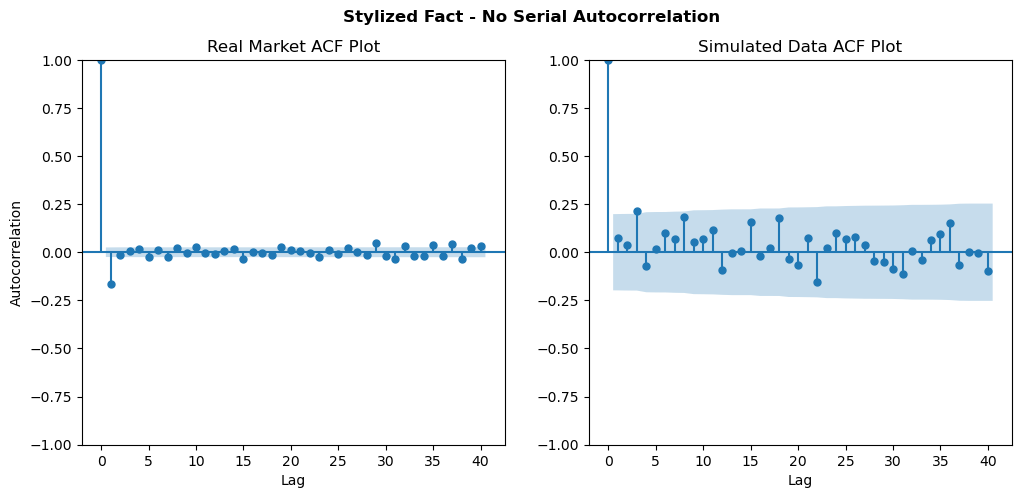

In [29]:
from statsmodels.graphics.tsaplots import plot_acf


return_data = yahoo_df['return'].dropna()
simulated_return_data = price_df['return_mid_price'].dropna()

# Create ACF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Stylized Fact - No Serial Autocorrelation', fontweight = 'bold', fontsize = 12) # set title
plot_acf(return_data, ax = ax1, lags = 40)  # Adjust lags as needed
plot_acf(simulated_return_data, ax = ax2, lags = 40)  # Adjust lags as needed

ax1.set_title('Real Market ACF Plot')
ax2.set_title('Simulated Data ACF Plot')
ax1.set_xlabel('Lag')
ax2.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
plt.show()

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with one row and one column
fig = make_subplots(rows=1, cols=2, specs=[[{'secondary_y': True}, {'secondary_y': True}]], subplot_titles = ['Real Market Data', 'Simulation Result'])

# Define your traces
daily_price_line = go.Scatter(x = merge_df.index, y = merge_df['Close'], name = 'Monthly Spot Rate')
interest_rate_diff_line = go.Scatter(x = merge_df.index, y = merge_df['interest_rate_diff'], name = 'Interest Rate Diff', line = dict(color = ' red'))

simulated_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'Simulated Mid Price', line = dict(color = 'black'))
simulated_interest_rate_diff_line = go.Scatter(x = price_df['time_steps'], y = price_df['interest_rate_diff'], name = 'Simulated Interest Rate Difference')

# Add trace1 to the subplot
fig.add_trace(daily_price_line, col = 1, row = 1)
fig.add_trace(interest_rate_diff_line, secondary_y=True, col = 1, row = 1)

fig.add_trace(simulated_price_line, col = 2, row = 1)
fig.add_trace(simulated_interest_rate_diff_line, secondary_y=True, col = 2, row = 1)

fig.update_layout(template = temp,
                  title = 'Stylized Fact - Interest Rate & Spot Rate',
                  hovermode = 'closest',
                  margin = dict(l = 40, r = 40, t = 60, b = 40),
                  height = 500, 
                  width = 1200, 
                  showlegend = True,
                  xaxis = dict(tickfont=dict(size=10)),  
                  yaxis = dict(side = "left", tickfont = dict(size=10)),
                  xaxis_showgrid = False, 
                  legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

# Show the figure
fig.show()